In [12]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import shapely.geometry as sg

# read in UFO data set
import os
working_directory = os.getcwd()
print(working_directory)

path = working_directory + '/UFO_Dataset/scrubbed.csv'
df = pd.read_csv(path)

# take a look at the first few rows of the data
df.head()

/Users/jeffreywatson/UFO Analysis


/var/folders/nz/gkp9tbzx2hjfcpyyzhlg1y400000gn/T/ipykernel_3654/3390378928.py:14: DtypeWarning: Columns (5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611


In [30]:
# get column names
print(df.columns)

# get number of rows
print(len(df))

Index(['datetime', 'city', 'state', 'country', 'shape', 'duration (seconds)',
       'duration (hours/min)', 'comments', 'date posted', 'latitude',
       'longitude ', 'year', 'month', 'day'],
      dtype='object')
80332


In [32]:
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day

In [33]:
df.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,year,month,day
0,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111,1949.0,10.0,10.0
1,1949-10-10 21:00:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082,1949.0,10.0,10.0
2,1955-10-10 17:00:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667,1955.0,10.0,10.0
3,1956-10-10 21:00:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833,1956.0,10.0,10.0
4,1960-10-10 20:00:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611,1960.0,10.0,10.0


In [34]:
# get column names
print(df.columns)

Index(['datetime', 'city', 'state', 'country', 'shape', 'duration (seconds)',
       'duration (hours/min)', 'comments', 'date posted', 'latitude',
       'longitude ', 'year', 'month', 'day'],
      dtype='object')


In [35]:
# Group the data by state
ufo_by_state = df.groupby('state')

# Count the number of UFO sightings in each state
ufo_counts = ufo_by_state.size().reset_index(name='counts')

# Sort the data by the counts column in descending order
ufo_counts = ufo_counts.sort_values('counts', ascending=False)

# Display the resulting dataframe
print(ufo_counts)

   state  counts
6     ca    9655
61    wa    4268
11    fl    4200
57    tx    3677
41    ny    3219
..   ...     ...
34    nf      25
39    nt      20
47    pe      17
66    yt      13
65    yk       7

[67 rows x 2 columns]


In [54]:
# Group the data by state
ufo_by_state = df.groupby('state')

# Count the number of UFO sightings in each state
ufo_counts = ufo_by_state.size().reset_index(name='counts')

# Sort the data by the counts column in descending order
ufo_counts = ufo_counts.sort_values('counts', ascending=False)

# Display the top 20 states
print(ufo_counts.head(20))

   state  counts
6     ca    9654
61    wa    4268
11    fl    4200
57    tx    3677
41    ny    3219
4     az    2688
16    il    2645
46    pa    2582
42    oh    2425
25    mi    2071
31    nc    1869
45    or    1845
44    on    1584
27    mo    1576
36    nj    1512
7     co    1505
59    va    1393
17    in    1386
21    ma    1358
12    ga    1347


In [36]:
#Count the number of UFO sightings in each country
ufo_sightings_by_country = df['country'].value_counts()
print(ufo_sightings_by_country)


us    65114
ca     3000
gb     1905
au      538
de      105
Name: country, dtype: int64


In [37]:
# group the data by year and count the number of sightings in each year
year_counts = df.groupby('year').size()

# find the year with the maximum number of sightings
most_sightings_year = year_counts.idxmax()

print(f'The year with the most UFO sightings is {most_sightings_year}')

The year with the most UFO sightings is 2012.0


In [39]:
#find the top 5 most common objects
top_shapes = df['shape'].value_counts()[:5]
print(top_shapes)

light       16565
triangle     7865
circle       7608
fireball     6208
other        5649
Name: shape, dtype: int64


In [41]:
non_numeric_rows = df[pd.to_numeric(df['duration (seconds)'], errors='coerce').isnull()]

In [42]:
print(non_numeric_rows['duration (seconds)'])





27822      2`
35692      8`
58591    0.5`
Name: duration (seconds), dtype: object


In [43]:
#There are 3 non numeric values in the column with the values, 27822, 35692, and 58591, so we will drop these 3
df = df[pd.to_numeric(df['duration (seconds)'], errors='coerce').notnull()]
#Calculate the mean and average of the duration seconds row
average_duration = df['duration (seconds)'].astype(float).mean()
median_duration = df['duration (seconds)'].astype(float).median()
#Print them
print(f"The average duration of UFO sightings is {average_duration:.2f} seconds.")
print(f"The median duration of UFO sightings is {median_duration:.2f} seconds.")

The average duration of UFO sightings is 9017.23 seconds.
The median duration of UFO sightings is 180.00 seconds.


In [44]:
# Extract the hour from the datetime column
df['hour'] = df['datetime'].dt.hour

# Group the data by the hour and count the number of sightings in each hour
hourly_counts = df.groupby('hour')['hour'].count()

# Find the hour with the most sightings
most_common_hour = hourly_counts.idxmax()

/var/folders/nz/gkp9tbzx2hjfcpyyzhlg1y400000gn/T/ipykernel_3654/3431156869.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df['datetime'].dt.hour


In [45]:
df.loc[:, 'time'] = df['datetime'].str[-8:]


AttributeError: Can only use .str accessor with string values!

In [46]:
most_common_time = df['time'].mode()[0]
print(f"The most common time for UFO sightings is {most_common_time}.")

KeyError: 'time'

In [48]:
df.loc[:, 'time'] = pd.to_datetime(df['datetime']).dt.time

/var/folders/nz/gkp9tbzx2hjfcpyyzhlg1y400000gn/T/ipykernel_3654/1449502583.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'time'] = pd.to_datetime(df['datetime']).dt.time


In [49]:
df_copy = df.copy()
df_copy.loc[:, 'time'] = pd.to_datetime(df_copy['datetime']).dt.time

In [50]:
most_common_time = df['time'].mode()[0]
print(f"The most common time for UFO sightings is {most_common_time}.")

The most common time for UFO sightings is 22:00:00.


<AxesSubplot:xlabel='year'>

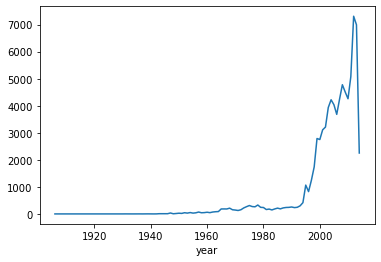

In [51]:
# Group the data by year and count the number of sightings in each year
ufo_counts_by_year = df.groupby('year').size()

# Plot the data
ufo_counts_by_year.plot()

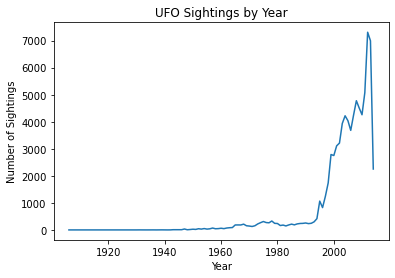

In [52]:
# Group the data by year and count the number of sightings in each year
ufo_by_year = df.groupby(by='year').size()

# Plot the number of sightings by year
plt.plot(ufo_by_year.index, ufo_by_year.values)

# Add labels and title to the plot
plt.xlabel('Year')
plt.ylabel('Number of Sightings')
plt.title('UFO Sightings by Year')

# Show the plot
plt.show()